# Matrix Multiplication

In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt, numpy as np

In [2]:
MNIST_URL = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data / 'mnist.pkl.gz'

In [3]:
from urllib.request import urlretrieve

In [4]:
if not path_gz.exists():
    urlretrieve(MNIST_URL, path_gz)

In [5]:
!ls -l data

total 16656
-rw-r--r-- 1 umangkaushik umangkaushik 17051982 Oct  2 13:36 mnist.pkl.gz


In [6]:
with gzip.open(path_gz, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [7]:
lst1 = list(x_train[420])
vals = lst1[200:210]
vals

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19921875, 0.890625, 0.984375]

In [8]:
len(lst1)

784

#### splitting a list

In [9]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [10]:
val_iter = chunks(vals, 5)
list(val_iter)

[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.19921875, 0.890625, 0.984375]]

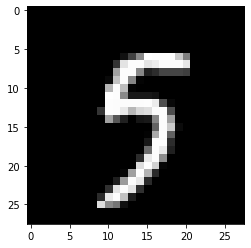

In [11]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

In [12]:
from itertools import islice

In [13]:
it = iter(lst1)

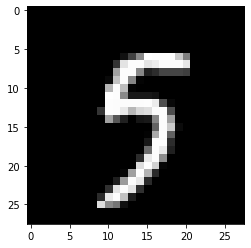

In [14]:
img = list(iter(lambda: list(islice(it, 28)), []))
plt.imshow(img);

In [15]:
class Matrix:
    def __init__(self, data): self.data = data
    def __getitem__(self, idxs): return self.data[idxs[0]][idxs[1]]

In [17]:
m = Matrix(img)
m[13, 15]

0.8671875

In [18]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x) + 1, int(y) + 1, int(z) + 1

- **divmod** -> returns a tuple containg the quotient and remainder when dividing two numbers

In [19]:
print(f"(quotient, remainder) --> {divmod(37, 5)}")

(quotient, remainder) --> (7, 2)


In [20]:
seed(69420)
rnd_state

(8885, 3, 1)

### Wichmann-Hill Algorithm
- used to generate random numbers in the range [0, 1].
- it uses 3 generators, that are combined to generate a single random number. 3 generators helps to improve the overall randomness of the generated sequence.

~~~
[r, s1, s2, s3] = function(s1, s2, s3) if 
    // s1, s2, s3 should be random from 1 to 30,000.
    s1 := mod(171 * s1, 30269)
    s2 := mod(172 * s2, 30307)
    s3 := mod(170 * s3, 30323)

    r := mod(s1/30269 + s2/30307 + s3/30323) % 1.0 
~~~

In [21]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (171 * y) % 30307
    z = (171 * z) % 30322
    rnd_state = x, y, z
    return (x/30269 + y/30307 + z/30322) % 1.0

In [22]:
rand(), rand(), rand()

(0.2169895896913624, 0.10521983722297445, 0.99259216512861)

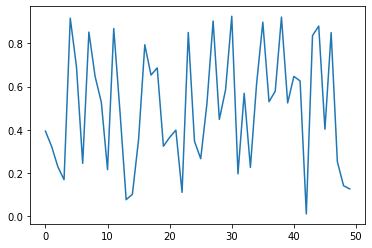

In [24]:
plt.plot([rand() for _ in range(50)]);

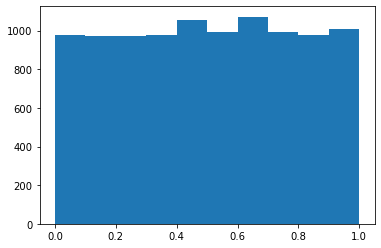

In [25]:
plt.hist([rand() for _ in range(10000)]);